# Import Packages

In [25]:
import nilearn as nil
from nilearn import plotting
from nilearn import image

import fsleyes
import nibabel as nib

import numpy as np
import pandas as pd

# Load nii.gz Data and Viz [nilearn 8.3.1](https://nilearn.github.io/auto_examples/plot_3d_and_4d_niimg.html#sphx-glr-auto-examples-plot-3d-and-4d-niimg-py)

### load 4d data

In [27]:
d4_data = "P00002012_S0001_RANN_ResidualizedFilteredMotionCorrectedFmri_InMNIspace_smoothed.nii.gz"
# d4_data = nib.load("P00002012_S0001_RANN_ResidualizedFilteredMotionCorrectedFmri_InMNIspace_smoothed.nii.gz")

In [29]:
print(image.load_img(d4_data).shape)

(91, 109, 91, 285)


In [31]:
first_d4_data = image.index_img(d4_data, 0)
print(first_d4_data.shape)

(91, 109, 91)


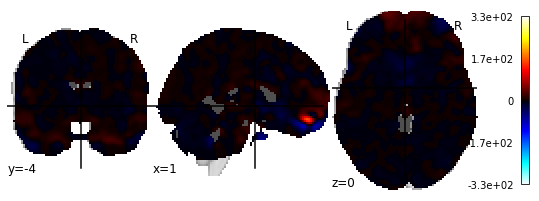

In [32]:
plotting.plot_stat_map(first_d4_data)

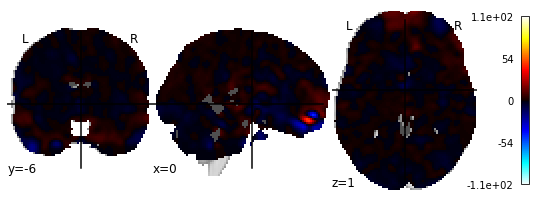

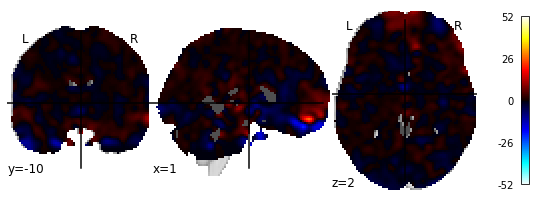

In [41]:
# looping on selected volumes
selected_vol = image.index_img(d4_data, slice(3, 5))

for img in image.iter_img(selected_vol):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(img)

### load MMP parcellation data and viz

In [42]:
parc_data = "MMP_in_MNI_corr.nii.gz"

In [43]:
print(image.load_img(parc_data).shape)

(256, 256, 256)


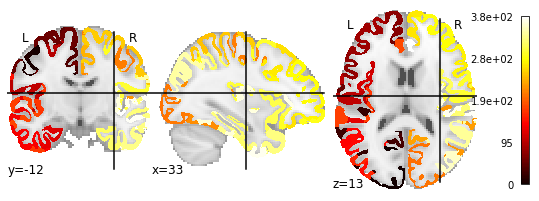

In [45]:
# looping on selected volumes
plotting.plot_stat_map(parc_data, threshold = 3)

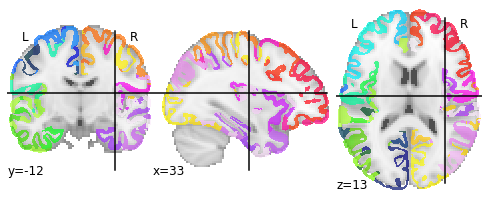

In [47]:
plotting.plot_roi(parc_data)

### read labels

In [109]:
csv_file = "mmp_roinames.csv"

labels = pd.read_csv("mmp_roinames.csv", header = None)

type(labels) 
# convert to list

labels = labels.values.tolist()

len(labels)

360

In [110]:
# flatten the label list
flat_labels = []
for sublist in labels: 
    for label in sublist: 
        flat_labels.append(label)
        
len(flat_labels)

360

### extract signals on a parcellation defined by labels [nilearn8.4.2.2](https://nilearn.github.io/auto_examples/03_connectivity/plot_signal_extraction.html#extract-signals-on-a-parcellation-defined-by-labels)
- using the NiftiLabelsMasker

In [111]:
from nilearn.input_data import NiftiLabelsMasker

In [112]:
masker = NiftiLabelsMasker(labels_img=parc_data, standardize=True,
                           verbose=5)

In [113]:
masker

NiftiLabelsMasker(background_label=0, detrend=False, dtype=None, high_pass=None,
                  labels_img='MMP_in_MNI_corr.nii.gz', low_pass=None,
                  mask_img=None, memory=Memory(location=None), memory_level=1,
                  resampling_target='data', smoothing_fwhm=None,
                  standardize=True, strategy='mean', t_r=None, verbose=5)

In [115]:
time_series = masker.fit_transform(d4_data)

[NiftiLabelsMasker.fit_transform] loading data from MMP_in_MNI_corr.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from Nifti1Image('P00002012_S0001_RANN_ResidualizedFilteredMotionCorrectedFmri_InMNIspace_smoothed.nii.gz')
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


In [116]:
time_series

array([[-1.2310829 ,  0.3696789 ,  0.7475836 , ...,  0.19961664,
        -0.8976758 ,  1.1210928 ],
       [-1.0639024 ,  0.29280823,  0.73849314, ...,  0.31743687,
        -0.5911829 ,  0.65684444],
       [-0.92759514,  0.19620152,  0.6947638 , ...,  0.39365488,
        -0.31822553,  0.21207978],
       ...,
       [-1.5389172 , -0.3922446 , -0.37064585, ..., -1.5226219 ,
        -0.06989636, -0.8534065 ],
       [-1.6055042 , -0.12784737, -0.36323455, ..., -1.5165596 ,
         0.56450135, -0.7194743 ],
       [-1.6678934 , -0.06230544, -0.24522349, ..., -1.5275186 ,
         0.7096977 , -0.8569895 ]], dtype=float32)

### Compute and display a correlation matrix [nilearn 8.4.2.3]

### without confounds

In [117]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

In [118]:
correlation_matrix.shape

(360, 360)

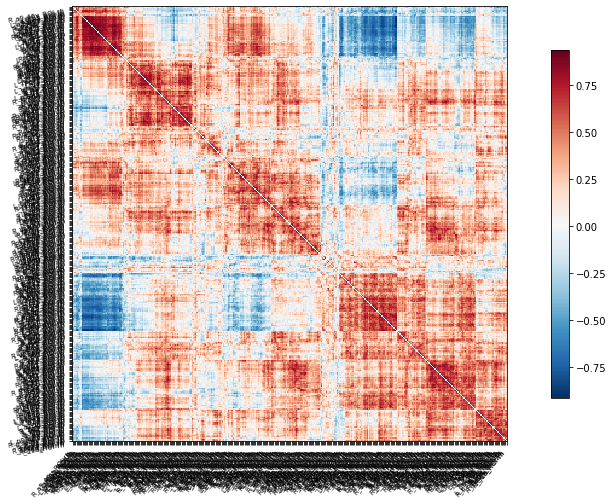

In [120]:
# Plot the correlation matrix
# import numpy as np
# from nilearn import plotting
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8),labels = flat_labels, reorder=True)

plotting.show()

### with confounds

In [122]:
time_series = masker.fit_transform(d4_data, confounds = csv_file)

[NiftiLabelsMasker.fit_transform] loading data from MMP_in_MNI_corr.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from Nifti1Image('P00002012_S0001_RANN_ResidualizedFilteredMotionCorrectedFmri_InMNIspace_smoothed.nii.gz')
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


TypeError: Could not read CSV file [mmp_roinames.csv]: Could not determine delimiter